Epoch [1/10] - Loss: 0.2573 - Accuracy: 0.5100
Epoch [2/10] - Loss: 0.2494 - Accuracy: 0.5500
Epoch [3/10] - Loss: 0.2481 - Accuracy: 0.5500
Epoch [4/10] - Loss: 0.2490 - Accuracy: 0.5500
Epoch [5/10] - Loss: 0.2486 - Accuracy: 0.5500
Epoch [6/10] - Loss: 0.2491 - Accuracy: 0.5500
Epoch [7/10] - Loss: 0.2480 - Accuracy: 0.5500
Epoch [8/10] - Loss: 0.2480 - Accuracy: 0.5500
Epoch [9/10] - Loss: 0.2484 - Accuracy: 0.5500
Epoch [10/10] - Loss: 0.2481 - Accuracy: 0.5500


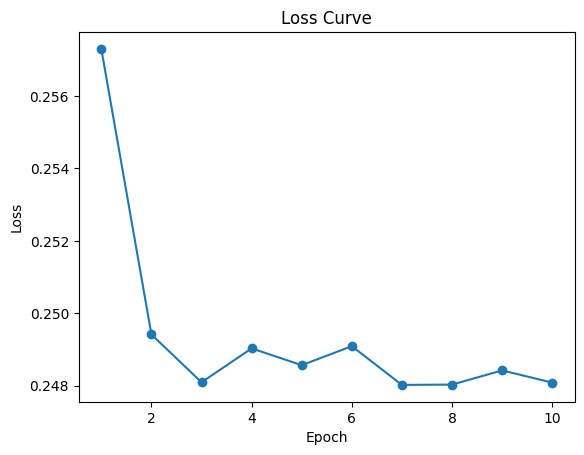

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(3, 4)
        self.hidden2 = nn.Linear(4, 4)
        self.output = nn.Linear(4, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden1(x))
        x = self.sigmoid(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x

# Generate random dataset
np.random.seed(42)
torch.manual_seed(42)

X = np.random.rand(100, 3).astype(np.float32)  # 100 samples, 3 features
y = np.random.randint(0, 2, (100, 2)).astype(np.float32)  # 100 samples, 2 output labels

# Convert to PyTorch tensors
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

# Define model, loss, and optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# Training loop
epochs = 10
batch_size = 10
loss_values = []

for epoch in range(epochs):
    permutation = torch.randperm(X_tensor.size(0))  # Shuffle dataset
    epoch_loss = 0

    for i in range(0, X_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_tensor[indices], y_tensor[indices]

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    # Calculate accuracy
    with torch.no_grad():
        predictions = model(X_tensor)
        predicted_labels = (predictions > 0.5).float()
        accuracy = (predicted_labels == y_tensor).float().mean().item()

    avg_loss = epoch_loss / (X_tensor.size(0) / batch_size)
    loss_values.append(avg_loss)

    print(f"Epoch [{epoch + 1}/{epochs}] - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(range(1, epochs + 1), loss_values, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


Epoch [1/10] - Loss: 0.2596 - Accuracy: 0.5100

Weight Updates:
hidden1.weight: Avg Change = 0.000077
hidden1.bias: Avg Change = 0.000119
hidden2.weight: Avg Change = 0.000374
hidden2.bias: Avg Change = 0.000604
output.weight: Avg Change = 0.003755
output.bias: Avg Change = 0.007648
--------------------------------------------------
Epoch [2/10] - Loss: 0.2580 - Accuracy: 0.5100

Weight Updates:
hidden1.weight: Avg Change = 0.000181
hidden1.bias: Avg Change = 0.000314
hidden2.weight: Avg Change = 0.000863
hidden2.bias: Avg Change = 0.001409
output.weight: Avg Change = 0.009328
output.bias: Avg Change = 0.018972
--------------------------------------------------
Epoch [3/10] - Loss: 0.2558 - Accuracy: 0.5100

Weight Updates:
hidden1.weight: Avg Change = 0.000178
hidden1.bias: Avg Change = 0.000314
hidden2.weight: Avg Change = 0.000840
hidden2.bias: Avg Change = 0.001379
output.weight: Avg Change = 0.009191
output.bias: Avg Change = 0.018701
----------------------------------------------

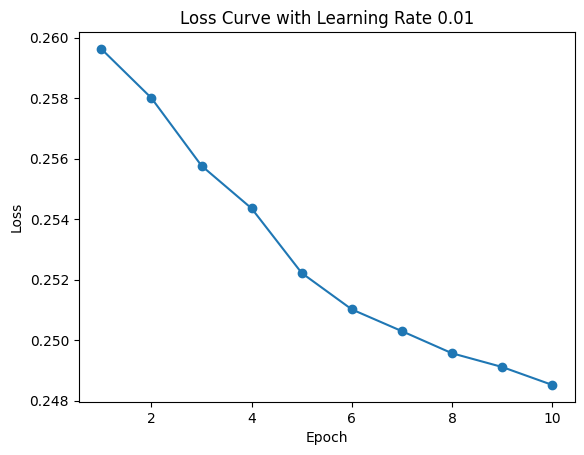

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(3, 4)
        self.hidden2 = nn.Linear(4, 4)
        self.output = nn.Linear(4, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden1(x))
        x = self.sigmoid(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x

# Generate random dataset
np.random.seed(42)
torch.manual_seed(42)

X = np.random.rand(100, 3).astype(np.float32)  # 100 samples, 3 features
y = np.random.randint(0, 2, (100, 2)).astype(np.float32)  # 100 samples, 2 output labels

# Convert to PyTorch tensors
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

# Define model, loss, and optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training loop
epochs = 10
batch_size = 10
loss_values = []

for epoch in range(epochs):
    permutation = torch.randperm(X_tensor.size(0))  # Shuffle dataset
    epoch_loss = 0

    # Store previous weights for comparison
    prev_weights = {name: param.clone().detach() for name, param in model.named_parameters()}

    for i in range(0, X_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_tensor[indices], y_tensor[indices]

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    # Calculate accuracy
    with torch.no_grad():
        predictions = model(X_tensor)
        predicted_labels = (predictions > 0.5).float()
        accuracy = (predicted_labels == y_tensor).float().mean().item()

    avg_loss = epoch_loss / (X_tensor.size(0) / batch_size)
    loss_values.append(avg_loss)

    # Print loss and accuracy
    print(f"Epoch [{epoch + 1}/{epochs}] - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}")

    # Print weight updates
    print("\nWeight Updates:")
    for name, param in model.named_parameters():
        weight_change = torch.abs(param - prev_weights[name]).mean().item()
        print(f"{name}: Avg Change = {weight_change:.6f}")

    print("-" * 50)

# Plot the loss curve
plt.plot(range(1, epochs + 1), loss_values, marker='o', linestyle='-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve with Learning Rate 0.01")
plt.show()



Training with MSE Loss:
MSE - Epoch [1/10] - Loss: 0.2598 - Accuracy: 0.5100
MSE - Epoch [2/10] - Loss: 0.2579 - Accuracy: 0.5100
MSE - Epoch [3/10] - Loss: 0.2558 - Accuracy: 0.5100
MSE - Epoch [4/10] - Loss: 0.2540 - Accuracy: 0.5100
MSE - Epoch [5/10] - Loss: 0.2524 - Accuracy: 0.5100
MSE - Epoch [6/10] - Loss: 0.2511 - Accuracy: 0.5100
MSE - Epoch [7/10] - Loss: 0.2501 - Accuracy: 0.5100
MSE - Epoch [8/10] - Loss: 0.2495 - Accuracy: 0.5100
MSE - Epoch [9/10] - Loss: 0.2491 - Accuracy: 0.5100
MSE - Epoch [10/10] - Loss: 0.2486 - Accuracy: 0.5100

Training with BCE Loss:
BCE - Epoch [1/10] - Loss: 0.7149 - Accuracy: 0.4500
BCE - Epoch [2/10] - Loss: 0.7069 - Accuracy: 0.4500
BCE - Epoch [3/10] - Loss: 0.6998 - Accuracy: 0.4500
BCE - Epoch [4/10] - Loss: 0.6944 - Accuracy: 0.5300
BCE - Epoch [5/10] - Loss: 0.6911 - Accuracy: 0.5500
BCE - Epoch [6/10] - Loss: 0.6896 - Accuracy: 0.5500
BCE - Epoch [7/10] - Loss: 0.6889 - Accuracy: 0.5500
BCE - Epoch [8/10] - Loss: 0.6885 - Accuracy: 0.

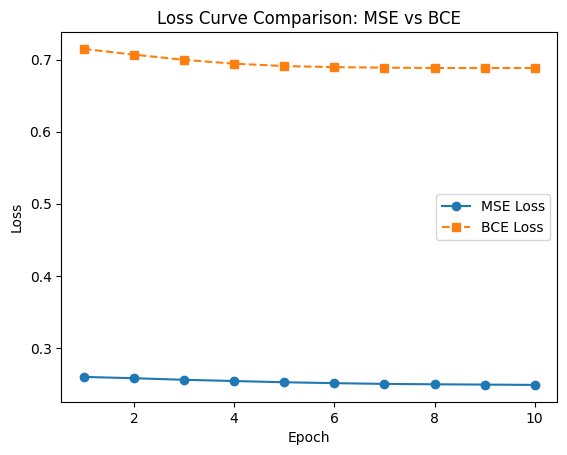

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(3, 4)
        self.hidden2 = nn.Linear(4, 4)
        self.output = nn.Linear(4, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden1(x))
        x = self.sigmoid(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x

# Generate random dataset
np.random.seed(42)
torch.manual_seed(42)

X = np.random.rand(100, 3).astype(np.float32)  # 100 samples, 3 features
y = np.random.randint(0, 2, (100, 2)).astype(np.float32)  # 100 samples, 2 output labels

# Convert to PyTorch tensors
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

# Define model, loss functions, and optimizer
model_mse = MLP()
model_bce = MLP()

criterion_mse = nn.MSELoss()
criterion_bce = nn.BCELoss()  # Binary Cross Entropy Loss

optimizer_mse = optim.SGD(model_mse.parameters(), lr=0.01, momentum=0.9)
optimizer_bce = optim.SGD(model_bce.parameters(), lr=0.01, momentum=0.9)

# Training function
def train(model, criterion, optimizer, loss_values, label):
    epochs = 10
    batch_size = 10

    for epoch in range(epochs):
        permutation = torch.randperm(X_tensor.size(0))  # Shuffle dataset
        epoch_loss = 0

        for i in range(0, X_tensor.size(0), batch_size):
            indices = permutation[i:i + batch_size]
            batch_x, batch_y = X_tensor[indices], y_tensor[indices]

            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        # Calculate accuracy
        with torch.no_grad():
            predictions = model(X_tensor)
            predicted_labels = (predictions > 0.5).float()
            accuracy = (predicted_labels == y_tensor).float().mean().item()

        avg_loss = epoch_loss / (X_tensor.size(0) / batch_size)
        loss_values.append(avg_loss)

        print(f"{label} - Epoch [{epoch + 1}/10] - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}")

# Train both models
loss_values_mse = []
loss_values_bce = []

print("\nTraining with MSE Loss:")
train(model_mse, criterion_mse, optimizer_mse, loss_values_mse, "MSE")

print("\nTraining with BCE Loss:")
train(model_bce, criterion_bce, optimizer_bce, loss_values_bce, "BCE")

# Plot the loss curves
plt.plot(range(1, 11), loss_values_mse, marker='o', linestyle='-', label="MSE Loss")
plt.plot(range(1, 11), loss_values_bce, marker='s', linestyle='--', label="BCE Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve Comparison: MSE vs BCE")
plt.legend()
plt.show()
